In [87]:
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.backends.backend_pdf import PdfPages

In [88]:
# NEW SPECTRA

bvt = pd.read_csv('202504_data/spectra_20250608/oldblue vane whitelight june8th.txt', sep='\t')
bvt = bvt.loc[:, ~bvt.columns.str.startswith("Capture_")].drop(columns=['Unnamed: 10'])

grn = pd.read_csv('202504_data/spectra_20250608/green board whitelight june8th.txt', sep='\t')
grn = grn.loc[:, ~grn.columns.str.startswith("Capture_")].drop(columns=['Unnamed: 12'])

yel = pd.read_csv('202504_data/spectra_20250608/yellow board whitelight june8th.txt', sep='\t')
yel = yel.loc[:, ~yel.columns.str.startswith("Capture_")].drop(columns=['Unnamed: 12'])


In [89]:
# BACKGROUNDS
# murdock = pd.read_csv('202504_data/UTF-8whitelight Murdock CMYc blue.txt', sep='\t')
# murdock = murdock.loc[:, ~murdock.columns.str.startswith("Capture_")].drop(columns=['Unnamed: 10'])
# murdock['avg'] = murdock[['Unnamed: 1', 'Unnamed: 3', 'Unnamed: 5', 'Unnamed: 7', 'Unnamed: 9']].mean(axis=1)
# murdock = murdock.drop(columns=['Unnamed: 1', 'Unnamed: 3', 'Unnamed: 5', 'Unnamed: 7', 'Unnamed: 9'])

# mirror = pd.read_csv('202504_data/UTF-8ag mirror background.txt', sep='\t')
# mirror = mirror.loc[:, ~mirror.columns.str.startswith("Capture_")].drop(columns=['Unnamed: 4'])
# mirror['avg'] = mirror[['Unnamed: 1', 'Unnamed: 3']].mean(axis=1)
# mirror = mirror.drop(columns=['Unnamed: 1', 'Unnamed: 3'])

rgb_bg = pd.read_csv('202504_data/rgb_white_background_refl.txt', sep='\t')
rgb_bg = rgb_bg.loc[:, ~rgb_bg.columns.str.startswith("Capture_")].drop(columns=['Unnamed: 10'])
rgb_bg['avg'] = rgb_bg[['Unnamed: 1', 'Unnamed: 3', 'Unnamed: 5', 'Unnamed: 7', 'Unnamed: 9']].mean(axis=1)
rgb_bg = rgb_bg.drop(columns=['Unnamed: 1', 'Unnamed: 3', 'Unnamed: 5', 'Unnamed: 7', 'Unnamed: 9'])

cmyc_bg = pd.read_csv('202504_data/cmyc_white_background_refl.txt', sep='\t')
cmyc_bg = cmyc_bg.loc[:, ~cmyc_bg.columns.str.startswith("Capture_")].drop(columns=['Unnamed: 12'])
cmyc_bg['avg'] = cmyc_bg[['Unnamed: 1', 'Unnamed: 3', 'Unnamed: 5', 'Unnamed: 7', 'Unnamed: 9', 'Unnamed: 11']].mean(axis=1)
cmyc_bg = cmyc_bg.drop(columns=['Unnamed: 1', 'Unnamed: 3', 'Unnamed: 5', 'Unnamed: 7', 'Unnamed: 9', 'Unnamed: 11'])

bg_dfs = {
    # 'murdock': murdock,
    # 'mirror': mirror,
    'rgb_bg': rgb_bg,
    'cmyc_bg': cmyc_bg
}

(400.0, 750.0)

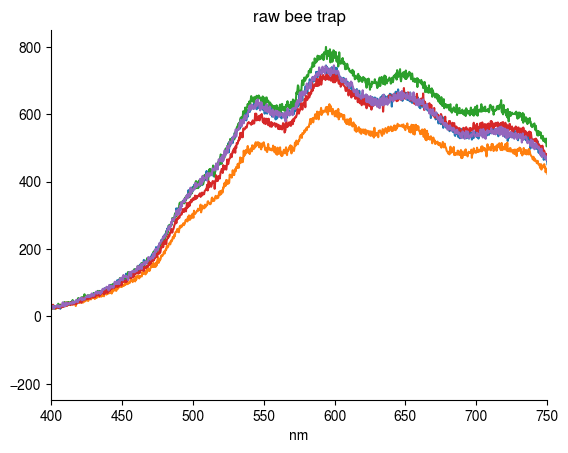

In [90]:
# RAW BEE TRAP

x_col = 'USB2G13063_1:101'
y_cols = ['Unnamed: 1', 'Unnamed: 3', 'Unnamed: 5', 'Unnamed: 7', 'Unnamed: 9']

plt.figure()
for col in y_cols:
    plt.plot(bvt[x_col], bvt[col])

plt.title('raw bee trap')
plt.xlabel('nm')
plt.xlim(400,750)

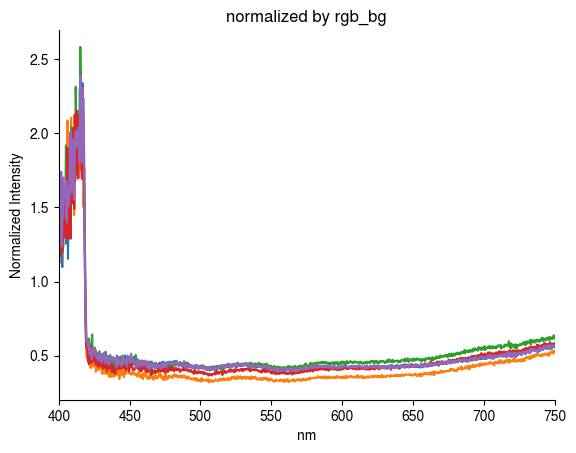

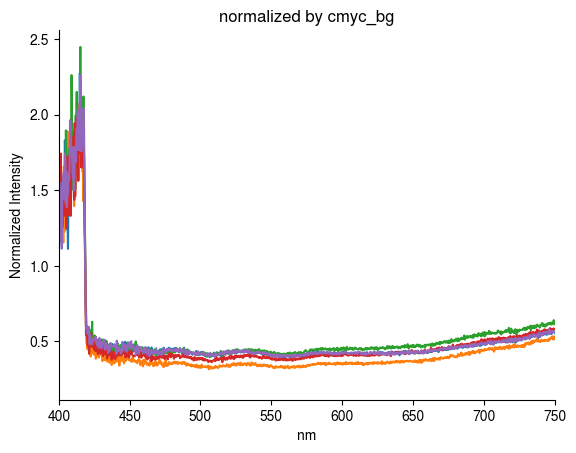

In [91]:
# NORMALIZED (DIVIDE BY BG)

for bg_name, bg_df in bg_dfs.items():
    plt.figure()
    for col in y_cols:
        norm_values = bvt[col] / bg_df['avg']
        plt.plot(bvt[x_col], norm_values, label=col)

    plt.title(f'normalized by {bg_name}')
    plt.xlabel('nm')
    plt.ylabel('Normalized Intensity')
    plt.xlim(400, 750)
 

(400.0, 750.0)

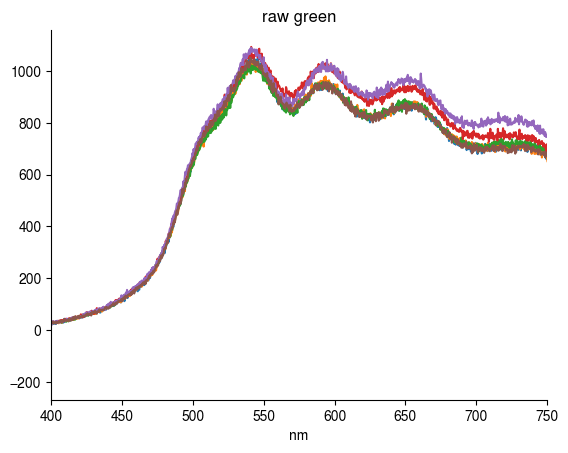

In [92]:
# RAW GREEN

x_col = 'USB2G13063_1:101'
y_cols = ['Unnamed: 1', 'Unnamed: 3', 'Unnamed: 5', 'Unnamed: 7', 'Unnamed: 9', 'Unnamed: 11']

plt.figure()
for col in y_cols:
    plt.plot(grn[x_col], grn[col])

plt.xlabel('nm')
plt.title('raw green')
plt.xlim(400,750)

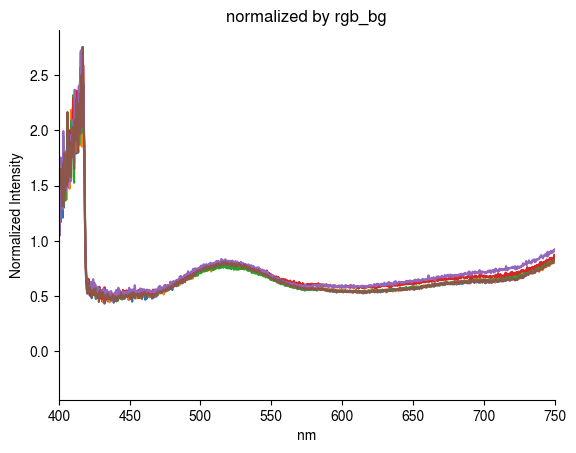

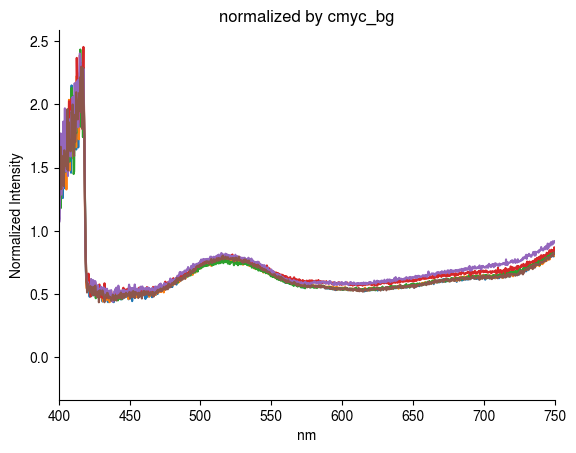

In [93]:
# NORMALIZED (DIVIDE BY BG)

for bg_name, bg_df in bg_dfs.items():
    plt.figure()
    for col in y_cols:
        norm_values = grn[col] / bg_df['avg']
        plt.plot(bvt[x_col], norm_values, label=col)

    plt.title(f'normalized by {bg_name}')
    plt.xlabel('nm')
    plt.ylabel('Normalized Intensity')
    plt.xlim(400, 750)

(400.0, 750.0)

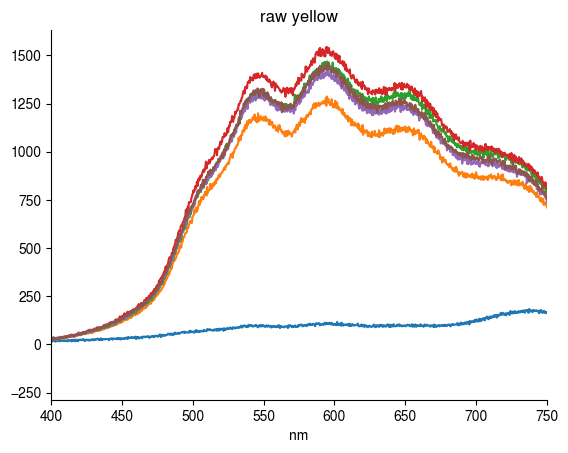

In [94]:
# RAW YELLOW

x_col = 'USB2G13063_1:101'
y_cols = ['Unnamed: 1', 'Unnamed: 3', 'Unnamed: 5', 'Unnamed: 7', 'Unnamed: 9', 'Unnamed: 11']

plt.figure()
for col in y_cols:
    plt.plot(yel[x_col], yel[col])

plt.xlabel('nm')
plt.title('raw yellow')
plt.xlim(400,750)

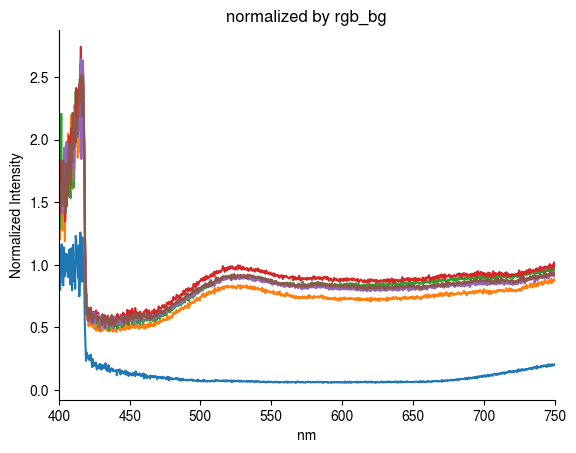

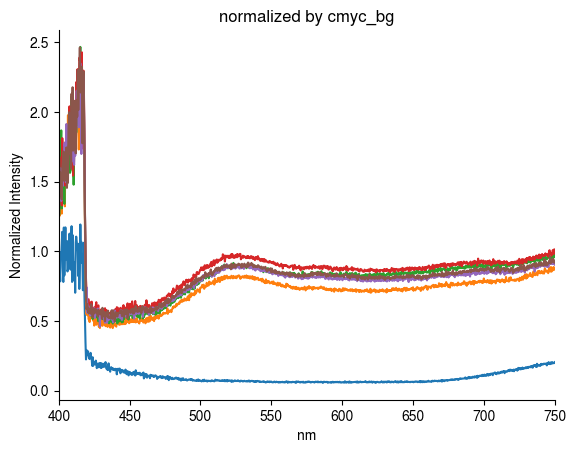

In [95]:
# NORMALIZED (DIVIDE BY BG)

for bg_name, bg_df in bg_dfs.items():
    plt.figure()
    for col in y_cols:
        norm_values = yel[col] / bg_df['avg']
        plt.plot(bvt[x_col], norm_values, label=col)

    plt.title(f'normalized by {bg_name}')
    plt.xlabel('nm')
    plt.ylabel('Normalized Intensity')
    plt.xlim(400, 750)